In [1]:
import statsmodels.stats.api as sms
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
bank=pd.read_csv("hmelq.csv")
bank.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
grps=pd.unique(bank.bad.values)
print(grps)

[0 1]


In [4]:
len(bank["loan"])

3576

bad: 
 


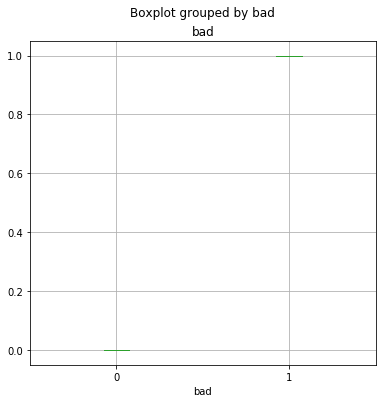

 
loan: 
 


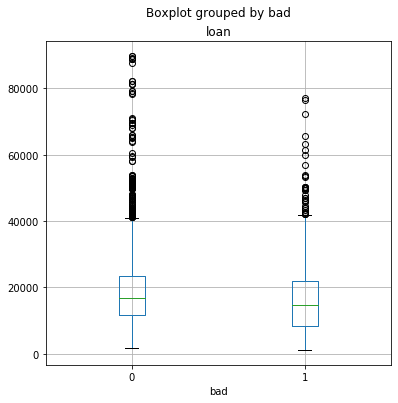

 
mortdue: 
 


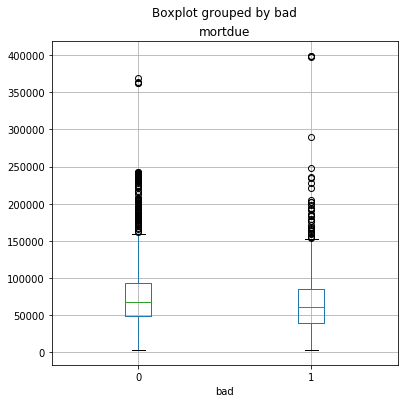

 
value: 
 


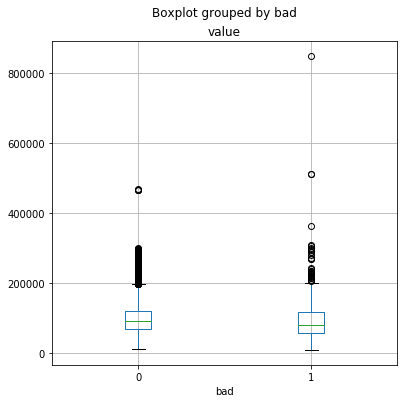

 
yoj: 
 


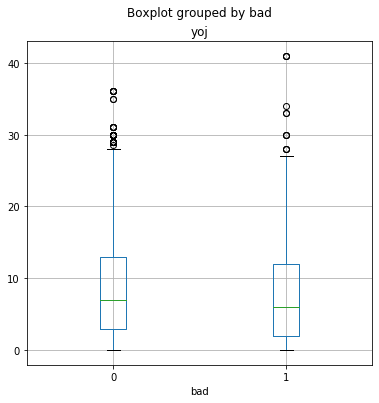

 
derog: 
 


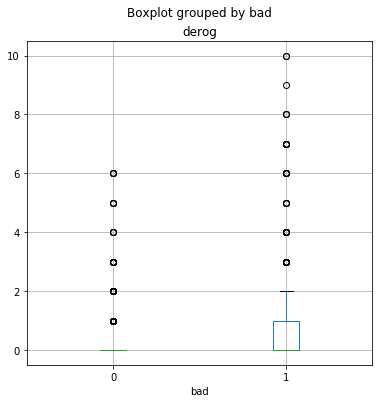

 
delinq: 
 


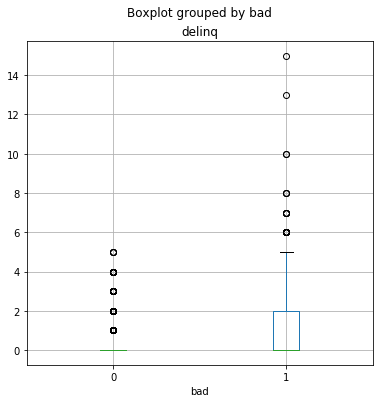

 
clage: 
 


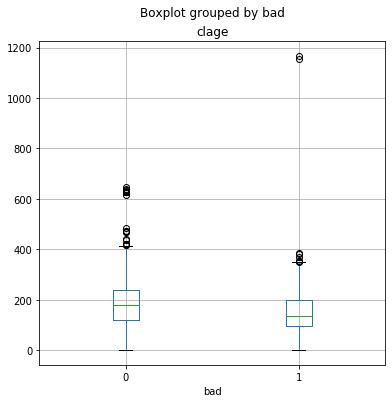

 
ninq: 
 


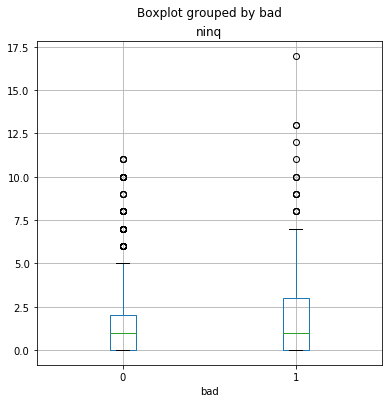

 
clno: 
 


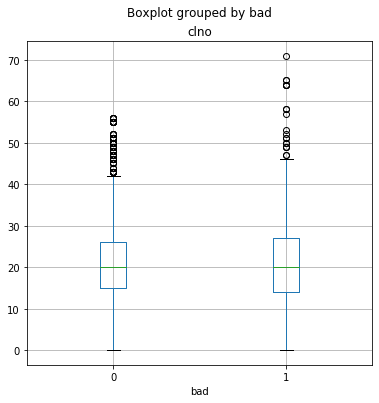

In [5]:
newcolumns=bank.columns.drop(['reason','job']) #boxplotlara ve Shapiro testlere kategorikleri almıyorum
df=pd.DataFrame(bank[newcolumns])

for category in df.columns[:-1]:
    print (category+": ")
    print (" ")
    df.boxplot(column=category, by="bad",figsize=(6,6))
    plt.show()
    print (" ")


In [6]:
MissingData=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') #  isnull() NaN varsa 1 dönüyor
MissingData 

,Variables,Missing Values
0,bad,0
1,loan,0
2,mortdue,314
3,value,64
4,yoj,312
5,derog,427
6,delinq,351
7,clage,179
8,ninq,303
9,clno,133


In [7]:
df.dropna(axis=0, how='any', inplace=True) #üstüne tekrar bakıp emin oluyorum
MissingData=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') #  isnull() NaN varsa 1 dönüyor
MissingData 

,Variables,Missing Values
0,bad,0
1,loan,0
2,mortdue,0
3,value,0
4,yoj,0
5,derog,0
6,delinq,0
7,clage,0
8,ninq,0
9,clno,0


In [8]:
df.shape

(2105, 11)

In [9]:
corr=bank[newcolumns].corr() #correlation bakıyorum.
corr.style.background_gradient(cmap='coolwarm')

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1,-0.0715234,-0.0562264,-0.0502544,-0.0515325,0.27098,0.345548,-0.150367,0.174759,-0.0089814,0.236738
loan,-0.0715234,1,0.229546,0.337453,0.123293,-0.00146278,-0.0215769,0.0890303,0.0486332,0.092377,0.0936357
mortdue,-0.0562264,0.229546,1,0.87328,-0.0899486,-0.0533096,-0.00497061,0.141236,0.029452,0.340139,0.167358
value,-0.0502544,0.337453,0.87328,1,0.00250113,-0.057279,-0.011014,0.182226,-0.00519074,0.290439,0.134187
yoj,-0.0515325,0.123293,-0.0899486,0.00250113,1,-0.0734999,0.0654005,0.184283,-0.0677348,0.0178093,-0.0522897
derog,0.27098,-0.00146278,-0.0533096,-0.057279,-0.0734999,1,0.234706,-0.0837549,0.16375,0.0486305,0.032324
delinq,0.345548,-0.0215769,-0.00497061,-0.011014,0.0654005,0.234706,1,0.044245,0.0811657,0.151996,0.0769433
clage,-0.150367,0.0890303,0.141236,0.182226,0.184283,-0.0837549,0.044245,1,-0.113367,0.221071,-0.0428518
ninq,0.174759,0.0486332,0.029452,-0.00519074,-0.0677348,0.16375,0.0811657,-0.113367,1,0.0976694,0.133751
clno,-0.0089814,0.092377,0.340139,0.290439,0.0178093,0.0486305,0.151996,0.221071,0.0976694,1,0.180983


Correlation tablosunda şüphelendiğim variablelar derog, delinw, debtinc. Belki ninq ve clage da bakılabilir.

In [10]:
print(df.describe(include='all'))

               bad          loan        mortdue          value          yoj  \
count  2105.000000   2105.000000    2105.000000    2105.000000  2105.000000   
mean      0.085986  19077.102138   75784.857482  106420.376247     9.067458   
std       0.280410  11290.210696   44167.439836   53542.862457     7.633427   
min       0.000000   1700.000000    5076.000000   23031.000000     0.000000   
25%       0.000000  11900.000000   49264.000000   71167.000000     3.000000   
50%       0.000000  16800.000000   67222.000000   94267.000000     7.000000   
75%       0.000000  23500.000000   92572.000000  121216.000000    13.000000   
max       1.000000  89900.000000  399412.000000  512650.000000    41.000000   

             derog       delinq        clage         ninq         clno  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.147743     0.255107   180.717558     1.019477    22.061758   
std       0.571442     0.775703    84.131623     1.560595     9.40

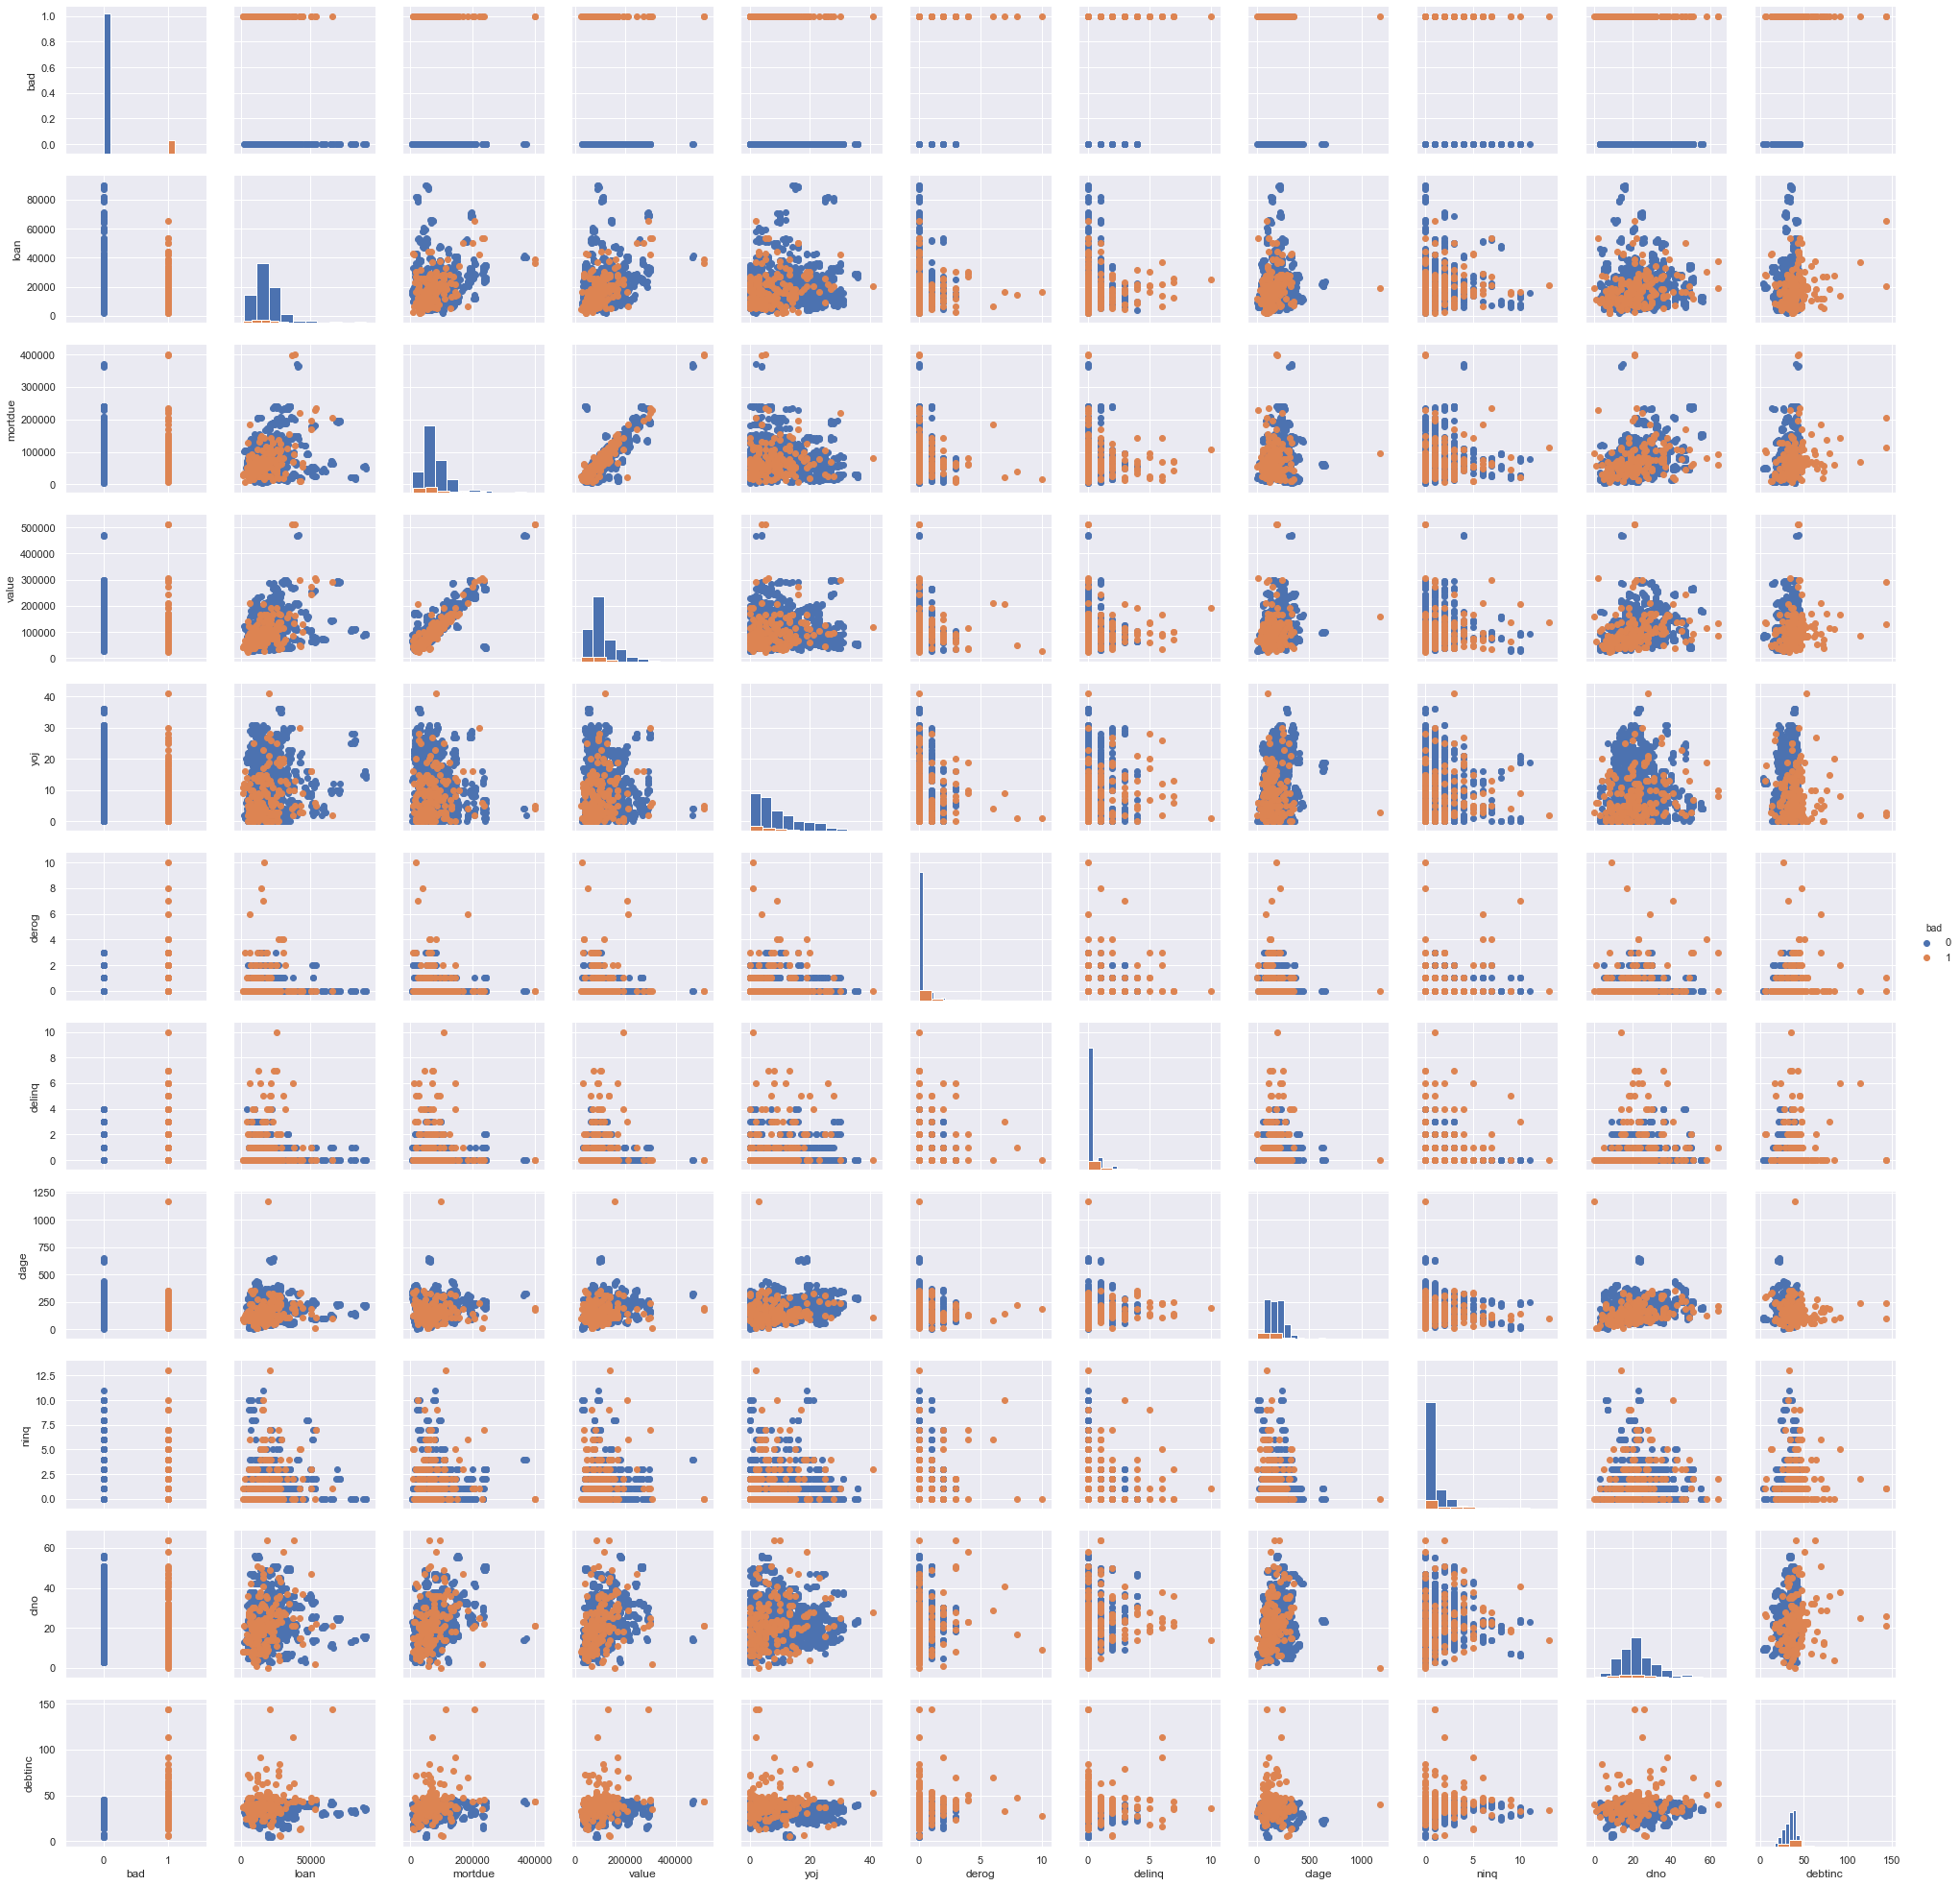

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

g = sns.PairGrid(df, hue="bad")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [12]:
from scipy.stats import shapiro #continuous olmayan variablelar da araya girmiş bulundu

for category in df.columns[:-1]:
    print (category+" : ")

    for name in grps:
        print(name,  shapiro(df[category][df['bad'] == name]))
    print (" ")

bad : 
0 (1.0, 1.0)
1 (1.0, 1.0)
 
loan : 
0 (0.7956977486610413, 5.885453550164232e-44)
1 (0.9045296311378479, 2.0234531827867386e-09)
 
mortdue : 
0 (0.8787813186645508, 2.5453777214467308e-36)
1 (0.7512526512145996, 3.3890862892696385e-16)
 
value : 
0 (0.8589469194412231, 1.8442751131791746e-38)
1 (0.7333866357803345, 9.111328934567086e-17)
 
yoj : 
0 (0.9125788807868958, 6.363385853910847e-32)
1 (0.8766403794288635, 4.9340385943619225e-11)
 
derog : 
0 (0.30066293478012085, 0.0)
1 (0.4721530079841614, 5.81210879296985e-23)
 
delinq : 
0 (0.38343751430511475, 0.0)
1 (0.6147846579551697, 5.649246795537095e-20)
 
clage : 
0 (0.9353772401809692, 4.026925717013056e-28)
1 (0.6687158942222595, 1.2689307318202608e-18)
 
ninq : 
0 (0.664009153842926, 0.0)
1 (0.7351685762405396, 1.0356499792510919e-16)
 
clno : 
0 (0.963139533996582, 9.86331293319224e-22)
1 (0.9458193778991699, 2.26503107114695e-06)
 


C:\Users\pinra_000\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1650: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [13]:
from scipy.stats import levene

arrr=['derog', 'delinq', 'debtinc',  'ninq'] #levene testini adaylarım için yapıyorum
for i in arrr:
    print(i +" için:"+str(levene(df[i][df['bad']==0], df[i][df['bad']==1])))

derog için:LeveneResult(statistic=119.76642995326307, pvalue=3.782961336911596e-27)
delinq için:LeveneResult(statistic=177.9437600150609, pvalue=5.011836866349701e-39)
debtinc için:LeveneResult(statistic=127.680234966471, pvalue=8.748739427071007e-29)
ninq için:LeveneResult(statistic=20.675290268892137, pvalue=5.750707693245181e-06)


In [14]:
from scipy import stats

for i in arrr:
    print(i +" için:"+str(stats.ttest_ind(df[i], df.bad))) #aynı değişkenler için t-test yapıyorum

derog için:Ttest_indResult(statistic=4.451393023410822, pvalue=8.752382032236644e-06)
delinq için:Ttest_indResult(statistic=9.40718331310139, pvalue=8.147188471762126e-21)
debtinc için:Ttest_indResult(statistic=185.5364842775458, pvalue=0.0)
ninq için:Ttest_indResult(statistic=27.0113565887868, pvalue=2.511274132396237e-148)


In [15]:

reasonss=pd.crosstab(index=bank['bad'],columns=bank['reason'])
reasonss.index = ["good","bad"]
reasonss   #crosstab for reason, tek bir dummy variable olabilir.

reason,DebtCon,HomeImp
good,1931,814
bad,440,244


In [16]:

jobb=pd.crosstab(index=bank['bad'],columns=bank['job'])
jobb.index = ["good","bad"]
jobb #crosstab for job, 5 dummy variable olabilir.

job,Mgr,Office,Other,ProfEx,Sales,Self
good,354,494,1099,639,43,81
bad,107,75,332,128,23,34


In [17]:
df.describe(include='all').T #kategorikler dropped

,count,mean,std,min,25%,50%,75%,max
bad,2105.0,0.085986,0.280410,0.00,0.00,0.000,0.000,1.000
loan,2105.0,19077.102138,11290.210696,1700.00,11900.00,16800.000,23500.000,89900.000
mortdue,2105.0,75784.857482,44167.439836,5076.00,49264.00,67222.000,92572.000,399412.000
value,2105.0,106420.376247,53542.862457,23031.00,71167.00,94267.000,121216.000,512650.000
yoj,2105.0,9.067458,7.633427,0.00,3.00,7.000,13.000,41.000
derog,2105.0,0.147743,0.571442,0.00,0.00,0.000,0.000,10.000
delinq,2105.0,0.255107,0.775703,0.00,0.00,0.000,0.000,10.000
clage,2105.0,180.717558,84.131623,0.49,118.15,176.330,229.520,1168.230
ninq,2105.0,1.019477,1.560595,0.00,0.00,0.000,2.000,13.000
clno,2105.0,22.061758,9.406685,0.00,16.00,21.000,27.000,64.000


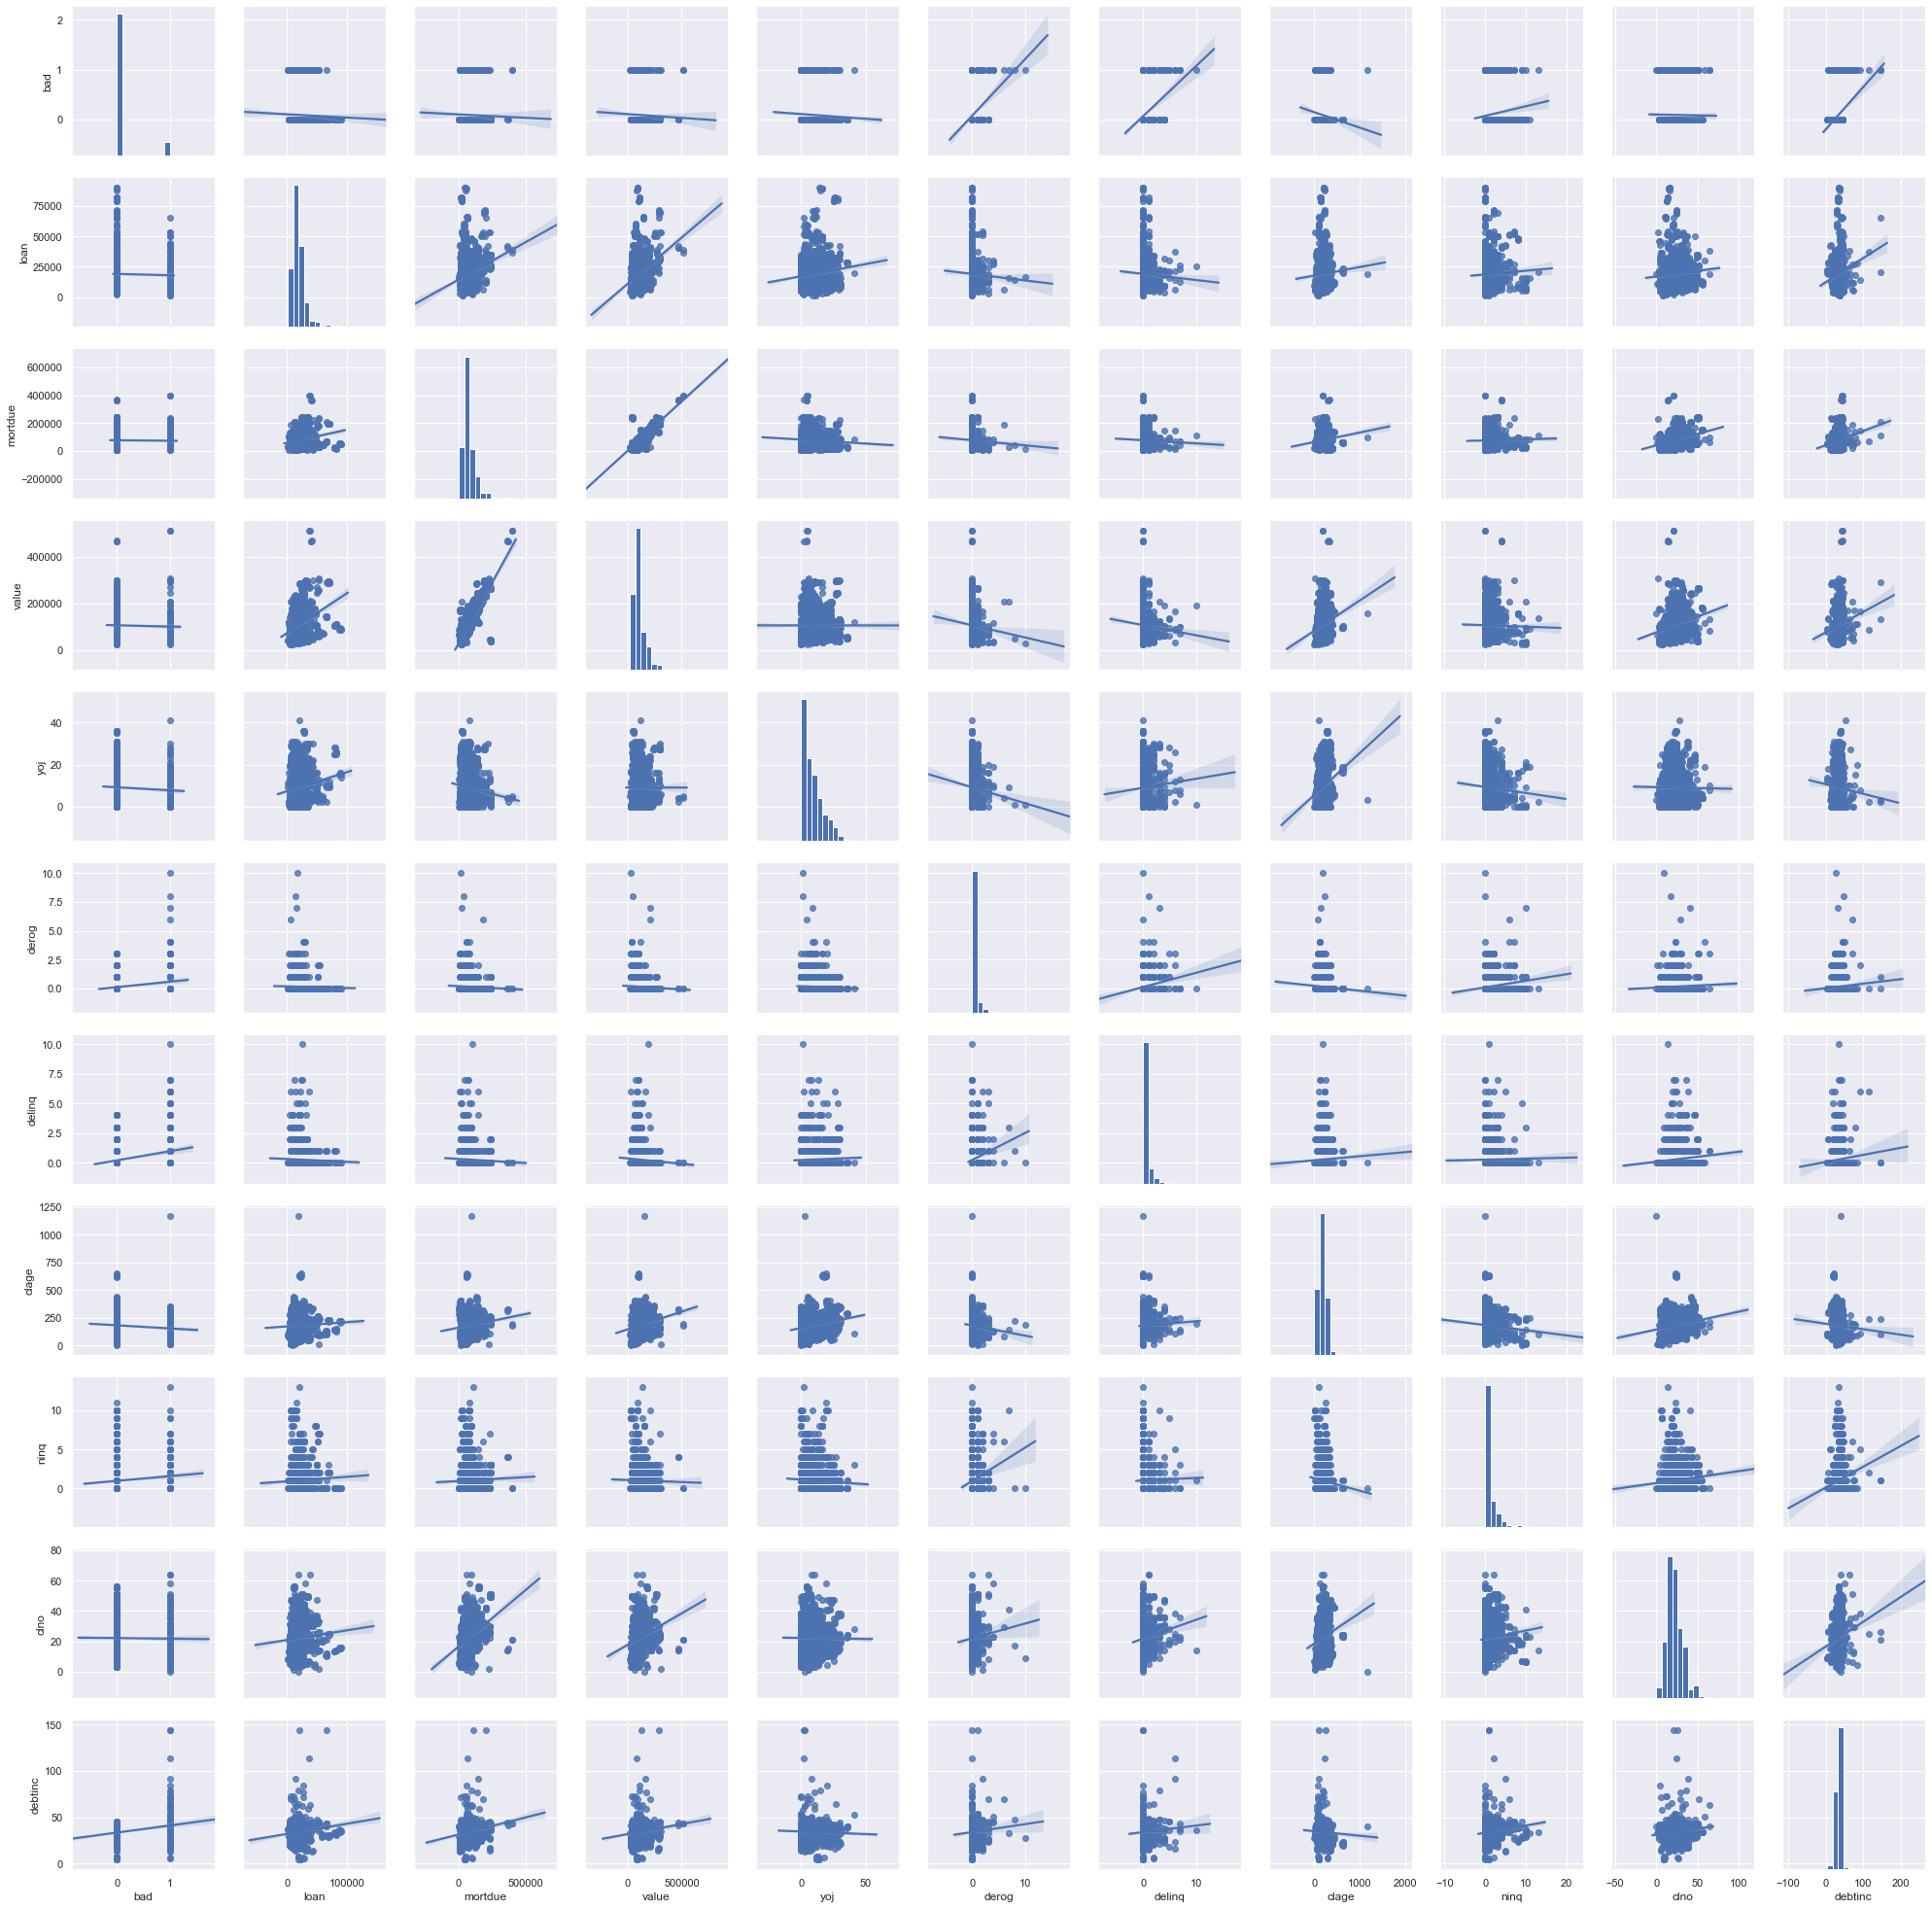

In [18]:
sns.pairplot(df,kind="reg")

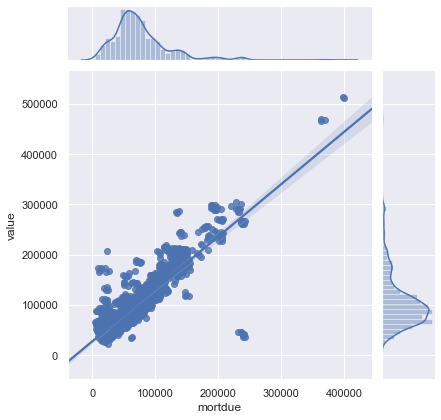

In [19]:
sns.jointplot(x="mortdue", y="value", data=df, kind="reg")

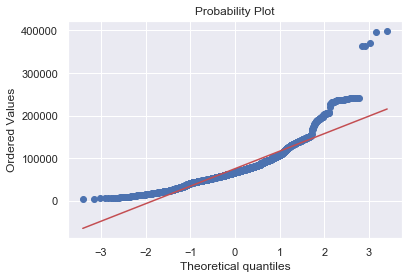

In [20]:
import scipy.stats as stats
import pylab
stats.probplot(df["mortdue"], dist="norm", plot=pylab) #normal prob plot
pylab.show()

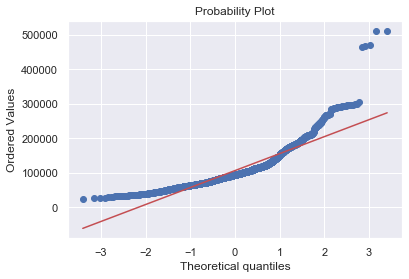

In [21]:
stats.probplot(df["value"], dist="norm", plot=pylab) #normal prob plot
pylab.show()

In [22]:
import statsmodels.api as sm
X = df[["mortdue"]] #double paranthesis
X[0:5]

,mortdue
0,18834.0
1,103960.0
2,46865.0
3,57676.0
4,56508.0


In [23]:
X = sm.add_constant(X) #not this time!
X[0:5]

C:\Users\pinra_000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,mortdue
0,1.0,18834.0
1,1.0,103960.0
2,1.0,46865.0
3,1.0,57676.0
4,1.0,56508.0


In [23]:
y = df["value"]
y[0:5]

0    108355.0
1    127384.0
2     61266.0
3     71027.0
4     78358.0
Name: value, dtype: float64

In [52]:
import statsmodels.api as sm

lm = sm.OLS(y,X) #ya da lm = sm.OLS(y,X).fit()
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          2.984e+04
Date:                Sat, 14 Sep 2019   Prob (F-statistic):                        0.00
Time:                        17:16:42   Log-Likelihood:                         -24727.
No. Observations:                2105   AIC:                                  4.946e+04
Df Residuals:                    2104   BIC:                                  4.946e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mortdue        1.3127      0.008    172.753      0.000       1.298       1.328
==============================================================================
Omnibus:                     1613.919   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123995.933
Skew:                          -2.981   Prob(JB):                         0.00
Kurtosis:                      40.124   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
import statsmodels.formula.api as smf #bu da deminki yönteme alternatif

lm = smf.ols("value ~ mortdue", df)
model = lm.fit()
model.summary()
model.params
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.738e+04,1181.909,23.166,0.000,2.51e+04,2.97e+04
mortdue,1.0429,0.013,77.398,0.000,1.017,1.069


In [27]:
model.params

Intercept    27380.689127
mortdue          1.042948
dtype: float64

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          2.984e+04
Date:                Sat, 14 Sep 2019   Prob (F-statistic):                        0.00
Time:                        17:14:36   Log-Likelihood:                         -24727.
No. Observations:                2105   AIC:                                  4.946e+04
Df Residuals:                    2104   BIC:                                  4.946e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mortdue        1.3127      0.008    172.753      0.000       1.298       1.328
==============================================================================
Omnibus:                     1613.919   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123995.933
Skew:                          -2.981   Prob(JB):                         0.00
Kurtosis:                      40.124   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
mortdue,1.3127,0.008,172.753,0.000,1.298,1.328


In [32]:
model.f_pvalue
print("f_pvalue: ", "%.4f" % model.f_pvalue) #burada amaç, tablodan tek tek değer çekmek. maksat kalabalık olmasın
print("fvalue: ", "%.2f" % model.fvalue)
print("tvalue: ", "%.2f" % model.tvalues[0:1]) #interceptin t valuesunu dönüyor. hepsini istersek döngüden çağırmalıyız

f_pvalue:  0.0000
fvalue:  29843.68
tvalue:  172.75


In [33]:
model.rsquared_adj


0.9341110213876125

In [34]:
model.fittedvalues[0:5]

0     24722.884914
1    136465.494086
2     61518.424205
3     75709.732944
4     74176.530779
dtype: float64

Text(0.5, 0, 'Mortdue')

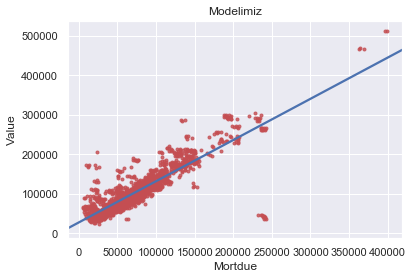

In [35]:
g = sns.regplot(df["mortdue"], df["value"], ci=None, scatter_kws={'color':'r','s':9})
g.set_title("Modelimiz")
g.set_ylabel("Value")
g.set_xlabel("Mortdue")

In [36]:
from sklearn.linear_model import LinearRegression #aynı modeli fit ediyoruz
X= df[["mortdue"]]
y = df["value"]
reg = LinearRegression()
model = reg.fit(X,y)

In [53]:
model.intercept_ #b0

AttributeError: 'OLSResults' object has no attribute 'intercept_'

In [54]:
model.coef_ #b1, b2,...

AttributeError: 'OLSResults' object has no attribute 'coef_'

In [55]:
model.score(X,y)

AttributeError: 'OLSResults' object has no attribute 'score'

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
lm = smf.ols("value ~ mortdue", df) #statsmodels.formula.api kısmında kurduğumuz model
model = lm.fit()

In [57]:
mse=mean_squared_error(y, model.fittedvalues) #fonksiyon sklearn içinden geliyor

In [58]:
mse #statsmodel için hesapladık

744559383.5461047

In [43]:
import numpy as np
import matplotlib.pyplot as plt
rmse = np.sqrt(mse)
rmse


27286.615465207564

In [44]:
reg.predict(X)[0:10]

array([ 47023.57712148, 135805.59280831,  76258.46049104,  87533.77439737,
        86315.6108008 ,  68385.24388954,  51573.9604878 ,  74684.65152937,
       146162.06927578,  93443.11937871])

In [45]:
y[0:10]

0    108355.0
1    127384.0
2     61266.0
3     71027.0
4     78358.0
5     66978.0
6    110481.0
7     82054.0
8    135146.0
9     78275.0
Name: value, dtype: float64

In [46]:
k_t= pd.DataFrame({"gercek_y": y[0:10], "tahmin_y":reg.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,108355.0,47023.577121
1,127384.0,135805.592808
2,61266.0,76258.460491
3,71027.0,87533.774397
4,78358.0,86315.610801
5,66978.0,68385.243890
6,110481.0,51573.960488
7,82054.0,74684.651529
8,135146.0,146162.069276
9,78275.0,93443.119379


In [59]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,108355.0,47023.577121,61331.422879,3.761543e+09
1,127384.0,135805.592808,-8421.592808,7.092323e+07
2,61266.0,76258.460491,-14992.460491,2.247739e+08
3,71027.0,87533.774397,-16506.774397,2.724736e+08
4,78358.0,86315.610801,-7957.610801,6.332357e+07
5,66978.0,68385.243890,-1407.243890,1.980335e+06
6,110481.0,51573.960488,58907.039512,3.470039e+09
7,82054.0,74684.651529,7369.348471,5.430730e+07
8,135146.0,146162.069276,-11016.069276,1.213538e+08
9,78275.0,93443.119379,-15168.119379,2.300718e+08


In [60]:
np.sum(k_t["hata_kare"])

8270790264.084504

In [61]:
np.mean(k_t["hata_kare"])

827079026.4084504

In [62]:
np.sqrt(np.mean(k_t["hata_kare"]))
model.resid[0:10]

0    61331.422879
1    -8421.592808
2   -14992.460491
3   -16506.774397
4    -7957.610801
5    -1407.243890
6    58907.039512
7     7369.348471
8   -11016.069276
9   -15168.119379
dtype: float64

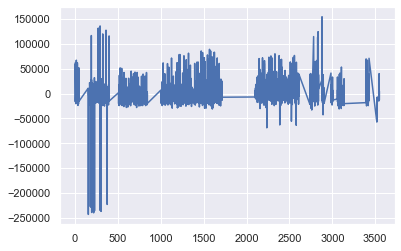

In [63]:
plt.plot(model.resid)

In [1]:
#const intercept drop + bütün x'leri ekle, kategorikleri dummyle

In [64]:
import statsmodels.api as sm

lm = sm.OLS(y,X) #ya da lm = sm.OLS(y,X).fit()
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          2.984e+04
Date:                Sat, 14 Sep 2019   Prob (F-statistic):                        0.00
Time:                        17:18:02   Log-Likelihood:                         -24727.
No. Observations:                2105   AIC:                                  4.946e+04
Df Residuals:                    2104   BIC:                                  4.946e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mortdue        1.3127      0.008    172.753      0.000       1.298       1.328
==============================================================================
Omnibus:                     1613.919   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123995.933
Skew:                          -2.981   Prob(JB):                         0.00
Kurtosis:                      40.124   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y, model.fittedvalues) #fonksiyon sklearn içinden geliyor

In [66]:
mse

934571329.8629751

In [67]:
rmse = np.sqrt(mse)
print(rmse)

reg.predict(X)[0:10]

30570.759392971824


array([ 47023.57712148, 135805.59280831,  76258.46049104,  87533.77439737,
        86315.6108008 ,  68385.24388954,  51573.9604878 ,  74684.65152937,
       146162.06927578,  93443.11937871])

In [68]:
k_t= pd.DataFrame({"gercek_y": y[0:10], "tahmin_y":reg.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,108355.0,47023.577121
1,127384.0,135805.592808
2,61266.0,76258.460491
3,71027.0,87533.774397
4,78358.0,86315.610801
5,66978.0,68385.243890
6,110481.0,51573.960488
7,82054.0,74684.651529
8,135146.0,146162.069276
9,78275.0,93443.119379


In [69]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,108355.0,47023.577121,61331.422879,3.761543e+09
1,127384.0,135805.592808,-8421.592808,7.092323e+07
2,61266.0,76258.460491,-14992.460491,2.247739e+08
3,71027.0,87533.774397,-16506.774397,2.724736e+08
4,78358.0,86315.610801,-7957.610801,6.332357e+07
5,66978.0,68385.243890,-1407.243890,1.980335e+06
6,110481.0,51573.960488,58907.039512,3.470039e+09
7,82054.0,74684.651529,7369.348471,5.430730e+07
8,135146.0,146162.069276,-11016.069276,1.213538e+08
9,78275.0,93443.119379,-15168.119379,2.300718e+08


In [70]:
np.sqrt(np.mean(k_t["hata_kare"]))
model.resid[0:10]

0    83632.115086
1    -9081.494086
2     -252.424205
3    -4682.732944
4     4181.469221
5    15368.944926
6    80030.922409
7    22516.399483
8   -14354.337836
9    -4872.338653
dtype: float64

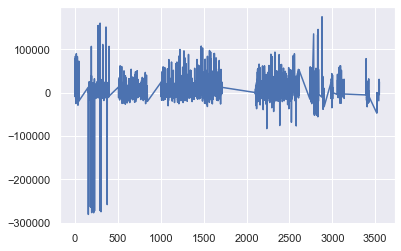

In [71]:
plt.plot(model.resid)

In [72]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [73]:
bank.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


In [74]:
bankcopy=pd.read_csv("hmelq.csv")

In [80]:
bca=bankcopy.dropna()

In [81]:
bca.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [82]:
bca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [83]:
bca.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [88]:
bca['bad'].value_counts() #az bad var

0    1840
1     178
Name: bad, dtype: int64

In [92]:
dms = pd.get_dummies(bca[['reason','job']]) #convert to dummy
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [93]:
y = bca["bad"]
X_ = bca.drop(["bad", "reason", "job"], axis=1).astype("float64")
X_.head()


,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [94]:

XX=pd.concat([X_, dms[["reason_DebtCon", "job_Mgr", "job_Office", "job_Other", "job_ProfEx", "job_Sales"]]], axis=1)
XX.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,1,0,0,0,0
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,1,0,0,0,0
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,1,0,0,0,0
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,0,1,0,0,0,0
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,1,0,0,0,0


In [95]:
XX.describe().T

,count,mean,std,min,25%,50%,75%,max
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000
debtinc,2018.0,34.105829,8.438411,4.03,29.2955,34.949,38.9520,144.189


In [96]:
loj = sm.Logit(y,XX)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.238483
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2002
Method:                           MLE   Df Model:                           15
Date:                Sat, 14 Sep 2019   Pseudo R-squ.:                  0.2007
Time:                        17:51:11   Log-Likelihood:                -481.26
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 6.349e-43
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.625e-05   1.07e-05     -2.453      0.014   -4.72e-05   -5.27e-06
mortdue        -4.837e-06   4.98e-06     -0.972      0.331   -1.46e-05    4.91e-06
value           1.216e-07   4.35e-06      0.028      0.978   -8.41e-06    8.66e-06
yoj               -0.0145      0.013     -1.114      0.265      -0.040       0.011
derog              0.5742      0.131      4.388      0.000       0.318       0.831
delinq             0.7806      0.091      8.595      0.000       0.603       0.959
clage             -0.0066      0.001     -4.898      0.000      -0.009      -0.004
ninq               0.0919      0.048      1.916      0.055      -0.002       0.186
clno              -0.0369      0.011     -3.488      0.000      -0.058      -0.016
debtinc            0.0704      0.010      6.833      0.000       0.050       0.091
reason_DebtCon    -0.0854      0.193     -0.443      0.658      -0.463       0.292
job_Mgr           -2.4682      0.364     -6.774      0.000      -3.182      -1.754
job_Office        -3.0527      0.381     -8.013      0.000      -3.799      -2.306
job_Other         -2.6848      0.317     -8.457      0.000      -3.307      -2.063
job_ProfEx        -2.5181      0.336     -7.494      0.000      -3.177      -1.860
job_Sales         -1.3558      0.620     -2.187      0.029      -2.571      -0.141
==================================================================================
"""

In [98]:
y_pred = loj_model.predict(XX)

In [99]:
confusion_matrix(y, y_pred) 

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [102]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.25, random_state= 42) #datayı böl
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
training = XX.copy()
print("training", training.shape)

(1513, 16)
(1513,)
(505, 16)
(505,)
training (2018, 16)


In [109]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(XX,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
loj_model.intercept_

array([-0.00187001])

In [111]:
loj_model.coef_

array([[-3.47454377e-05, -6.99865817e-06, -1.66672432e-06,
        -1.40168374e-02,  5.00310714e-03,  8.92762107e-03,
        -8.95874399e-03,  3.36225812e-03, -1.29824688e-02,
         2.51504312e-02, -1.26000721e-03, -4.58375173e-06,
        -9.95183435e-04, -9.79713076e-04, -5.14406868e-04,
         2.81979493e-04]])

In [113]:
y_pred = loj_model.predict(XX)

In [115]:
confusion_matrix(y, y_pred) #wtf haahahahahaha

array([[1835,    5],
       [ 178,    0]], dtype=int64)

In [116]:
accuracy_score(y,y_pred)

0.9093161546085233

In [117]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.00      0.00      0.00       178

    accuracy                           0.91      2018
   macro avg       0.46      0.50      0.48      2018
weighted avg       0.83      0.91      0.87      2018



In [119]:
y_probs = loj_model.predict_proba(XX)
y_probs = y_probs[:,1]

In [120]:
y_probs[0:10]

array([0.06449388, 0.18927749, 0.01385308, 0.16580351, 0.18684739,
       0.01473376, 0.14522231, 0.03686345, 0.24868325, 0.03909358])

In [121]:
y_pred = [1 if i> 0.5 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [127]:
y_pred = [1 if i> 0.5 else 0 for i in y_probs]
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [130]:
print(classification_report(y,y_pred)) #threshold 0.5 iken durum rezalet. 
#herkese good dedik geçtik. 5 tane bad tahmin ettik onlar da tutmadı.

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.00      0.00      0.00       178

    accuracy                           0.91      2018
   macro avg       0.46      0.50      0.48      2018
weighted avg       0.83      0.91      0.87      2018



In [133]:
y_pred = [1 if i> 0.3 else 0 for i in y_probs]   #threshold = 0.3 iken bi tık daha toparladık
print(confusion_matrix(y, y_pred))
print(classification_report(y,y_pred)) 

[[1810   30]
 [ 157   21]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1840
           1       0.41      0.12      0.18       178

    accuracy                           0.91      2018
   macro avg       0.67      0.55      0.57      2018
weighted avg       0.88      0.91      0.88      2018



In [135]:
y_pred = [1 if i> 0.2 else 0 for i in y_probs]   #threshold = 0.2 iken bu sefer saçmalama diğer yöne kaydı.
print(confusion_matrix(y, y_pred))
print(classification_report(y,y_pred)) 

[[1644  196]
 [ 115   63]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1840
           1       0.24      0.35      0.29       178

    accuracy                           0.85      2018
   macro avg       0.59      0.62      0.60      2018
weighted avg       0.87      0.85      0.86      2018



In [136]:
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(XX)[:,1])
print (fpr[0:10])
print (tpr[0:10])
print (thresholds[0:10])

[0.         0.00054348 0.00380435 0.00380435 0.00434783 0.00434783
 0.0048913  0.0048913  0.00597826 0.00597826]
[0.         0.         0.         0.00561798 0.00561798 0.02247191
 0.02247191 0.03370787 0.03370787 0.04494382]
[1.52880379 0.52880379 0.46101892 0.45996368 0.45389257 0.42936333
 0.41524972 0.38645644 0.37887877 0.370582  ]


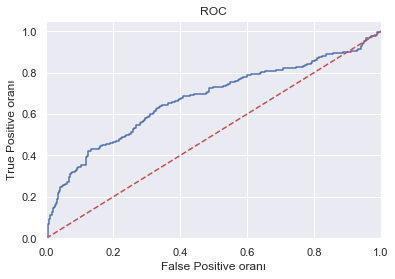

In [139]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(XX))
logit_roc_auc 

plt.figure()
plt.plot(fpr, tpr, label ='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive oranı')
plt.ylabel('True Positive oranı')
plt.title('ROC')
plt.show() #korkunçluk abidesi